<a href="https://colab.research.google.com/github/daniivelascoo/ifp-programacion-ia/blob/main/Lab_1_4_Pokemon_Viz_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚡ Laboratorio 1.4: Visualización de Datos (Pokémon)
**Núcleo Formativo 1 - Visualización y Storytelling**

---
### 📜 Contexto
Tienes acceso a la **Pokédex** completa (base de datos de 800 especies).
Tu objetivo no es "capturarlos a todos", sino **entenderlos a todos**.

Como analista de datos de la Liga Pokémon, debes responder preguntas complejas usando gráficos:
*   ¿Cómo se distribuye el poder de ataque?
*   ¿Qué tipo de Pokémon es más rápido?
*   ¿Existe relación entre el peso y la defensa?
*   ¿Qué estadísticas están correlacionadas?

### 🎯 Tu Misión
Usar **Seaborn** para crear 4 visualizaciones clave que revelen los secretos de los datos.

---

In [1]:
# --- ⚙️ 0. CARGA DE DATOS (NO TOCAR) ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo
sns.set_theme(style="whitegrid")

# URL estable del dataset oficial
url_pokemon = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"

try:
    print("📡 Descargando Pokédex...")
    df = pd.read_csv(url_pokemon)

    # Limpieza rápida de nombres de columnas para facilitar el trabajo
    df.columns = df.columns.str.replace('.', '').str.replace(' ', '_')
    # Columnas esperadas: ['#', 'Name', 'Type_1', 'Type_2', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Legendary']

    print(f"✅ Datos cargados: {df.shape[0]} Pokémon registrados.")
    display(df.head(3))
except Exception as e:
    print(f"❌ Error de carga: {e}")

📡 Descargando Pokédex...
✅ Datos cargados: 800 Pokémon registrados.


,#,Name,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False


---
## 📊 FASE 1: Distribución (Histograma)

**Pregunta:** ¿Es común encontrar Pokémon con mucho Ataque, o la mayoría son débiles?

**Misión:**
1.  Crea un Histograma (`histplot`) de la columna `Attack`.
2.  Añade la curva de densidad (`kde=True`) para ver la forma suave.
3.  Usa el color `'firebrick'` (Rojo fuego).

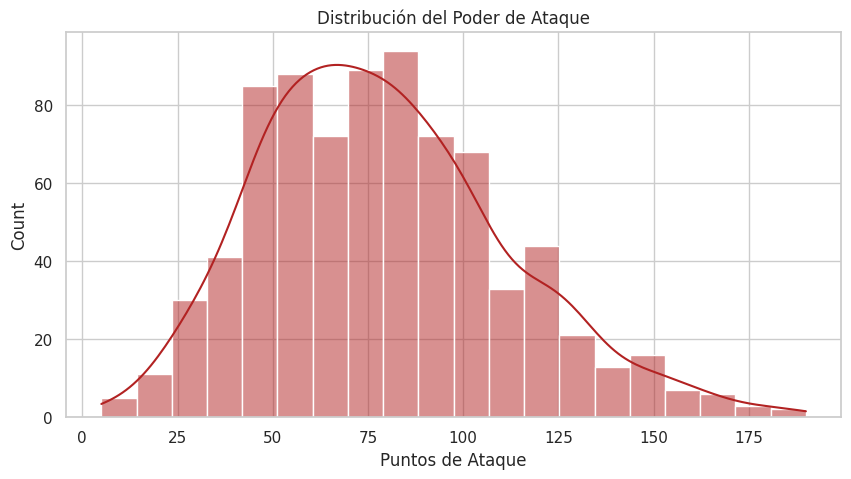

In [2]:
plt.figure(figsize=(10, 5))

# TU CÓDIGO AQUÍ:
# Pista: data=df, x='Attack', ...
sns.histplot(data=df, x='Attack', kde=True, color='firebrick')

plt.title("Distribución del Poder de Ataque")
plt.xlabel("Puntos de Ataque")
plt.show()

---
## 📦 FASE 2: Comparación (Boxplot)

**Pregunta:** ¿Qué Elemento (Type_1) tiene los Pokémon más rápidos? ¿Los de Fuego, Agua, Roca...?

**Misión:**
1.  Crea un Boxplot.
2.  **Eje X:** `Type_1` (Categoría).
3.  **Eje Y:** `Speed` (Numérico).
4.  **Importante:** Rota las etiquetas del eje X 90 grados para que se lean bien.

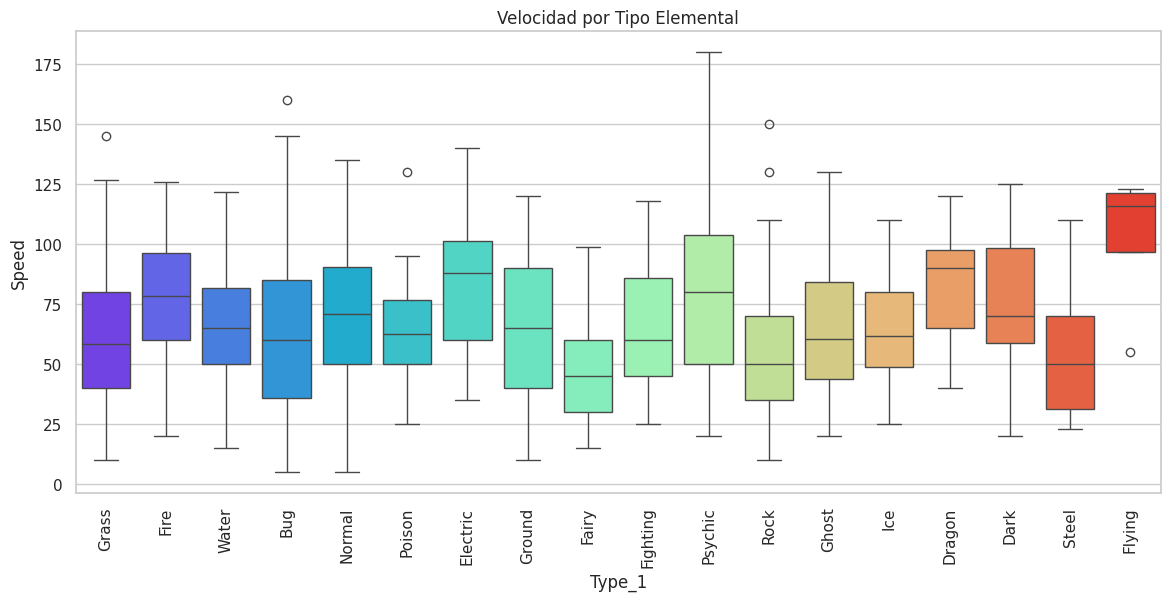

In [10]:
plt.figure(figsize=(14, 6))

# TU CÓDIGO AQUÍ:
sns.boxplot(data=df, x='Type_1', y='Speed', hue='Type_1', palette='rainbow', legend=False)

plt.title("Velocidad por Tipo Elemental")
# Rotar etiquetas del eje X
plt.xticks(rotation=90)
plt.show()

### 📝 REFLEXIÓN (Obligatorio)
*Haz doble clic aquí para editar.*

**Observa el gráfico:** ¿Qué tipo parece tener la mediana de velocidad más alta (la línea del medio de la caja está más arriba)? ¿Flying (Volador) o Electric (Eléctrico)?

**Respuesta:**

---
## 🔵 FASE 3: Relación Multivariable (Scatterplot)

**Pregunta:** ¿Los Pokémon Legendarios destacan por su Ataque y Defensa?

**Misión:**
1.  Crea un Scatterplot (Nube de puntos).
2.  **Eje X:** `Attack`.
3.  **Eje Y:** `Defense`.
4.  **Hue (Color):** `Legendary` (Esto pintará de otro color a los legendarios).

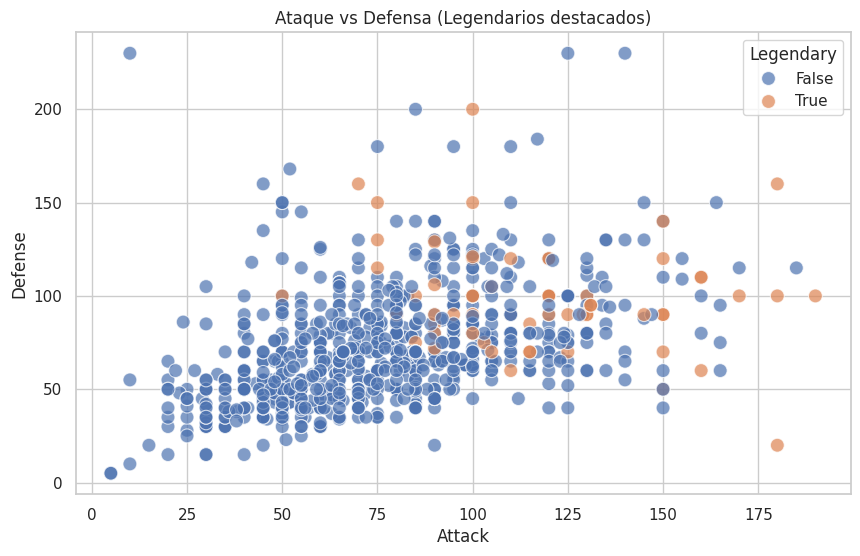

In [11]:
plt.figure(figsize=(10, 6))

# TU CÓDIGO AQUÍ:
sns.scatterplot(
    data=df,
    x='Attack',
    y='Defense',
    hue='Legendary',
    s=100, # Tamaño del punto
    alpha=0.7 # Transparencia
)

plt.title("Ataque vs Defensa (Legendarios destacados)")
plt.show()

---
## 🔥 FASE 4: Correlación (Heatmap)

**Pregunta:** ¿Existe relación entre las distintas estadísticas de combate?

**Misión:**
1.  Selecciona solo las columnas numéricas de combate: `HP`, `Attack`, `Defense`, `Sp_Atk`, `Sp_Def`, `Speed`.
2.  Calcula la matriz de correlación (`.corr()`).
3.  Pinta el Mapa de Calor (`heatmap`) con anotaciones (`annot=True`).

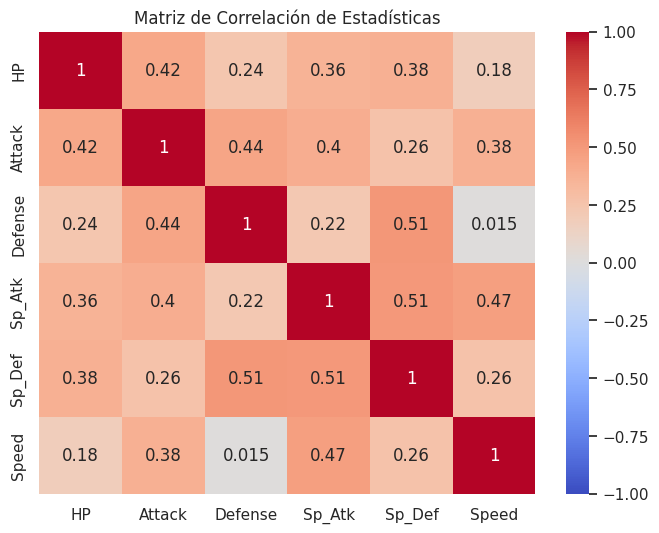

In [12]:
# 1. Filtramos columnas
cols_combate = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']
df_combate = df[cols_combate]

# 2. Matriz de correlación
matriz_corr = df_combate.corr()

# 3. Heatmap
plt.figure(figsize=(8, 6))
# TU CÓDIGO AQUÍ:
sns.heatmap(data=matriz_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title("Matriz de Correlación de Estadísticas")
plt.show()

---
## 🏁 VALIDACIÓN FINAL
Ejecuta la celda de abajo para comprobar tu trabajo.

In [13]:
# --- 🤖 CÓDIGO DE VALIDACIÓN (NO MODIFICAR) ---
def validar_pokemon():
    print("🚀 AUDITANDO TUS GRÁFICOS...\n")
    puntos = 0
    errores = []

    # 1. VALIDACIÓN DE DATOS
    if 'df' in globals():
        if globals()['df'].shape[0] == 800:
             print("✅ Datos Pokedex: CORRECTO.")
             puntos += 2.5
        else:
             errores.append("❌ El DataFrame no tiene 800 filas. Revisa la carga.")
    else:
        errores.append("❌ No encuentro la variable 'df'.")

    # 2. VALIDACIÓN DE CÓDIGO (AUDITORÍA HISTORIAL)
    # Buscamos si has ejecutado las funciones de Seaborn
    historial = "\n".join(globals().get('_ih', []))

    graficos_ok = 0
    if 'histplot' in historial: graficos_ok += 1
    if 'boxplot' in historial: graficos_ok += 1
    if 'scatterplot' in historial: graficos_ok += 1
    if 'heatmap' in historial: graficos_ok += 1

    if graficos_ok >= 3:
        print(f"✅ Gráficos detectados: {graficos_ok}/4.")
        puntos += 7.5
    else:
        errores.append(f"❌ Faltan gráficos. Solo detecto {graficos_ok} tipos de gráficos ejecutados.")
        errores.append("   (Asegúrate de ejecutar todas las celdas de código).")

    # REPORTE
    print("\n" + "="*50)
    if puntos == 10:
        print(f"🎉 ¡MAESTRO POKÉMON! Has completado el entrenamiento visual.")
        print("Estás listo para el Hito 1 (Data Analyst).")
    else:
        print("⚠️ REVISA LOS ERRORES:")
        for e in errores: print(f"   - {e}")
    print("="*50)

validar_pokemon()

🚀 AUDITANDO TUS GRÁFICOS...

✅ Datos Pokedex: CORRECTO.
✅ Gráficos detectados: 4/4.

🎉 ¡MAESTRO POKÉMON! Has completado el entrenamiento visual.
Estás listo para el Hito 1 (Data Analyst).
